# 1.0 Data Preprocessing

In this section, the raw dataset will be load and cleaned. The raw dataset load are the hour.csv and day.csv.

## 1.1 Import libary

In [203]:
import pandas as pd
import numpy as np

import warnings

from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

## 1.2 Load data

In [204]:
df_hour = pd.read_csv("../dataset/hour.csv")
df_day = pd.read_csv("../dataset/day.csv")

In [205]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [206]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## 1.3 Renaming column

In [207]:
df_renamed_day = df_day.rename(
                        columns={'instant':'index',
                                 'dteday':'date',
                                 'yr':'year',
                                 'mnth':'month',
                                 'hr':'hour',
                                 'weathersit':'weather',
                                 'temp':'temperature',
                                 'atemp':'temperaturefelt',
                                 'hum':'humidity',
                                 'casual':'casualuser',
                                 'registered':'registereduser',
                                 'cnt':'count'})
# df_concatenated.head()
df_renamed_day.head()

,index,date,season,year,month,holiday,weekday,workingday,weather,temperature,temperaturefelt,humidity,windspeed,casualuser,registereduser,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 1.5 Dropping column

### Check the coorelation

<AxesSubplot:>

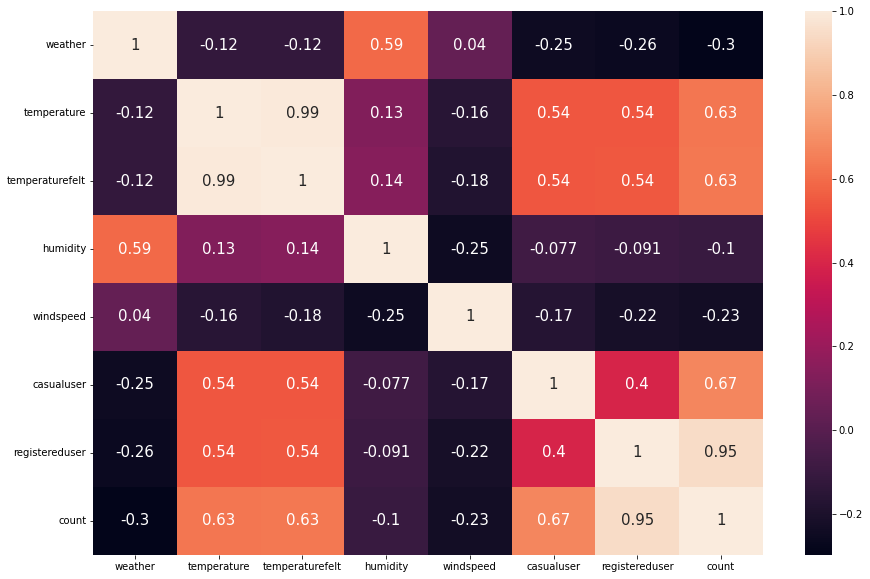

In [208]:
plt.figure(figsize=(15,10))
df_cor = df_renamed_day.copy()
df_cor = df_cor.drop(columns=['index', 'date', 'workingday', 'month', 'season', 'year', 'holiday', 'weekday'])
cor = df_cor.corr()
sns.heatmap(cor, annot = True, annot_kws = {'size':15})

In [209]:
df_day_data = df_renamed_day.drop(columns = ['index', 'date', 'workingday', 'holiday', 'temperaturefelt', 'casualuser', 'registereduser'])
df_day_data.head()

,season,year,month,weekday,weather,temperature,humidity,windspeed,count
0,1,0,1,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,2,1,0.200000,0.590435,0.160296,1562
4,1,0,1,3,1,0.226957,0.436957,0.186900,1600


In [210]:
df_day_data.dtypes

season           int64
year             int64
month            int64
weekday          int64
weather          int64
temperature    float64
humidity       float64
windspeed      float64
count            int64
dtype: object

## Add new column
categories the temperature, humidity and windspeed

In [211]:
df_day_data['temp_cat'] = 0.0
df_day_data['hum_cat'] = 0.0
df_day_data['wind_cat'] = 0.0
        
for i in range(len(df_day_data)):
    # temperature
    if(df_day_data['temperature'][i] < 0.0):
        df_day_data['temp_cat'][i] = '< 0.0'
    elif(df_day_data['temperature'][i] >= 0.0 and df_day_data['temperature'][i] < 0.1):
        df_day_data['temp_cat'][i] = '0.0 - 0.1'
    elif (df_day_data['temperature'][i] >= 0.1 and df_day_data['temperature'][i] < 0.2):
        df_day_data['temp_cat'][i] = '0.1 - 0.2'
    elif (df_day_data['temperature'][i] >= 0.1 and df_day_data['temperature'][i] < 0.3):
        df_day_data['temp_cat'][i] = '0.2 - 0.3'
    elif (df_day_data['temperature'][i] >= 0.3 and df_day_data['temperature'][i] < 0.4):
        df_day_data['temp_cat'][i] = '0.3 - 0.4'
    elif (df_day_data['temperature'][i] >= 0.4 and df_day_data['temperature'][i] < 0.5):
        df_day_data['temp_cat'][i] = '0.4 - 0.5'
    elif (df_day_data['temperature'][i] >= 0.5 and df_day_data['temperature'][i] < 0.6):
        df_day_data['temp_cat'][i] = '0.5 - 0.6'
    elif (df_day_data['temperature'][i] >= 0.6 and df_day_data['temperature'][i] < 0.7):
        df_day_data['temp_cat'][i] = '0.6 - 0.7'
    elif (df_day_data['temperature'][i] >= 0.7 and df_day_data['temperature'][i] < 0.8):
        df_day_data['temp_cat'][i] = '0.7 - 0.8'
    elif (df_day_data['temperature'][i] >= 0.8 and df_day_data['temperature'][i] < 0.9):
        df_day_data['temp_cat'][i] = '0.8 - 0.9'
    elif (df_day_data['temperature'][i] >= 0.9 and df_day_data['temperature'][i] < 1.0):
        df_day_data['temp_cat'][i] = '0.9 - 1.0'
    else:
        df_day_data['temp_cat'][i] = '> 1.0'
    
    # humidity
    if(df_day_data['humidity'][i] < 0.0):
        df_day_data['hum_cat'][i] = '< 0.0'
    elif(df_day_data['humidity'][i] >= 0.0 and df_day_data['humidity'][i] < 0.1):
        df_day_data['hum_cat'][i] = '0.0 - 0.1'
    elif (df_day_data['humidity'][i] >= 0.1 and df_day_data['humidity'][i] < 0.2):
        df_day_data['hum_cat'][i] = '0.1 - 0.2'
    elif (df_day_data['humidity'][i] >= 0.1 and df_day_data['humidity'][i] < 0.3):
        df_day_data['hum_cat'][i] = '0.2 - 0.3'
    elif (df_day_data['humidity'][i] >= 0.3 and df_day_data['humidity'][i] < 0.4):
        df_day_data['hum_cat'][i] = '0.3 - 0.4'
    elif (df_day_data['humidity'][i] >= 0.4 and df_day_data['humidity'][i] < 0.5):
        df_day_data['hum_cat'][i] = '0.4 - 0.5'
    elif (df_day_data['humidity'][i] >= 0.5 and df_day_data['humidity'][i] < 0.6):
        df_day_data['hum_cat'][i] = '0.5 - 0.6'
    elif (df_day_data['humidity'][i] >= 0.6 and df_day_data['humidity'][i] < 0.7):
        df_day_data['hum_cat'][i] = '0.6 - 0.7'
    elif (df_day_data['humidity'][i] >= 0.7 and df_day_data['humidity'][i] < 0.8):
        df_day_data['hum_cat'][i] = '0.7 - 0.8'
    elif (df_day_data['humidity'][i] >= 0.8 and df_day_data['humidity'][i] < 0.9):
        df_day_data['hum_cat'][i] = '0.8 - 0.9'
    elif (df_day_data['humidity'][i] >= 0.9 and df_day_data['humidity'][i] < 1.0):
        df_day_data['hum_cat'][i] = '0.9 - 1.0'
    else:
        df_day_data['hum_cat'][i] = '> 1.0'
        
    # windspeed
    if(df_day_data['windspeed'][i] < 0.0):
        df_day_data['wind_cat'][i] = '< 0.0'
    elif(df_day_data['windspeed'][i] >= 0.0 and df_day_data['windspeed'][i] < 0.1):
        df_day_data['wind_cat'][i] = '0.0 - 0.1'
    elif (df_day_data['windspeed'][i] >= 0.1 and df_day_data['windspeed'][i] < 0.2):
        df_day_data['wind_cat'][i] = '0.1 - 0.2'
    elif (df_day_data['windspeed'][i] >= 0.1 and df_day_data['windspeed'][i] < 0.3):
        df_day_data['wind_cat'][i] = '0.2 - 0.3'
    elif (df_day_data['windspeed'][i] >= 0.3 and df_day_data['windspeed'][i] < 0.4):
        df_day_data['wind_cat'][i] = '0.3 - 0.4'
    elif (df_day_data['windspeed'][i] >= 0.4 and df_day_data['windspeed'][i] < 0.5):
        df_day_data['wind_cat'][i] = '0.4 - 0.5'
    elif (df_day_data['windspeed'][i] >= 0.5 and df_day_data['windspeed'][i] < 0.6):
        df_day_data['wind_cat'][i] = '0.5 - 0.6'
    elif (df_day_data['windspeed'][i] >= 0.6 and df_day_data['windspeed'][i] < 0.7):
        df_day_data['wind_cat'][i] = '0.6 - 0.7'
    elif (df_day_data['windspeed'][i] >= 0.7 and df_day_data['windspeed'][i] < 0.8):
        df_day_data['wind_cat'][i] = '0.7 - 0.8'
    elif (df_day_data['windspeed'][i] >= 0.8 and df_day_data['windspeed'][i] < 0.9):
        df_day_data['wind_cat'][i] = '0.8 - 0.9'
    elif (df_day_data['windspeed'][i] >= 0.9 and df_day_data['windspeed'][i] < 1.0):
        df_day_data['wind_cat'][i] = '0.9 - 1.0'
    else:
        df_day_data['wind_cat'][i] = '> 1.0'

df2 = df_day_data

# # (t+8)/(47), t_min=-8, t_max=+39
# df2["New Temp"] = 0.0
# for i in range(len(df2)):
#     df2["New Temp"][i] = (df2["temperature"][i] * 47) - 8
    
df_day_data = df_day_data.drop(columns=['temp_cat', 'hum_cat', 'wind_cat'])
df2.head(100)

,season,year,month,weekday,weather,temperature,humidity,windspeed,count,temp_cat,hum_cat,wind_cat
0,1,0,1,6,2,0.344167,0.805833,0.160446,985,0.3 - 0.4,0.8 - 0.9,0.1 - 0.2
1,1,0,1,0,2,0.363478,0.696087,0.248539,801,0.3 - 0.4,0.6 - 0.7,0.2 - 0.3
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349,0.1 - 0.2,0.4 - 0.5,0.2 - 0.3
3,1,0,1,2,1,0.200000,0.590435,0.160296,1562,0.2 - 0.3,0.5 - 0.6,0.1 - 0.2
4,1,0,1,3,1,0.226957,0.436957,0.186900,1600,0.2 - 0.3,0.4 - 0.5,0.1 - 0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,0,4,3,1,0.390833,0.470833,0.263063,2808,0.3 - 0.4,0.4 - 0.5,0.2 - 0.3
96,2,0,4,4,1,0.437500,0.602917,0.162312,3141,0.4 - 0.5,0.6 - 0.7,0.1 - 0.2
97,2,0,4,5,2,0.335833,0.836250,0.226992,1471,0.3 - 0.4,0.8 - 0.9,0.2 - 0.3
98,2,0,4,6,2,0.342500,0.877500,0.133083,2455,0.3 - 0.4,0.8 - 0.9,0.1 - 0.2


## Outlier Checking

### Weekday

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Weekday'), Text(0, 0.5, 'Count')]

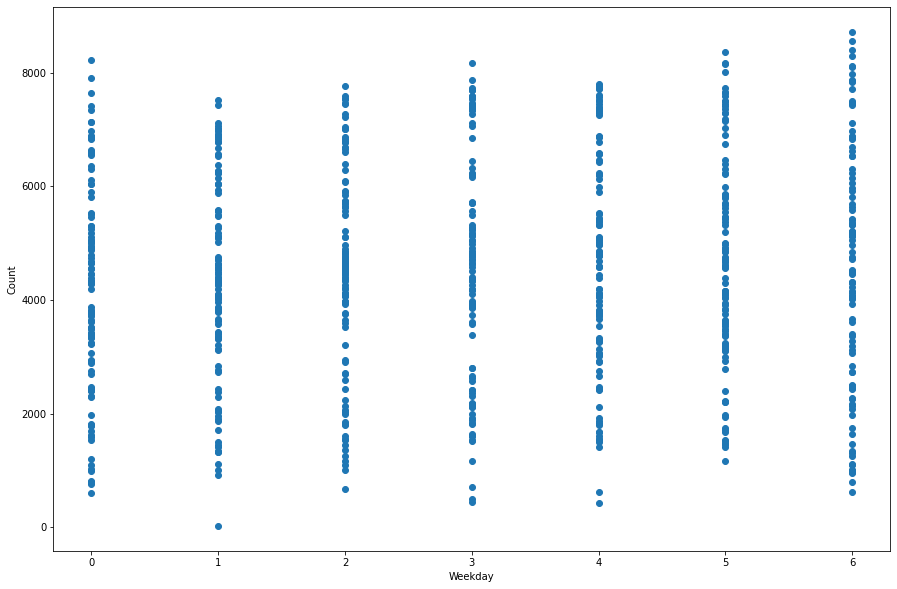

In [212]:
figure, axes = plt.subplots(figsize = (15, 10))

plt.scatter(data = df_day_data, x = 'weekday', y = 'count')
axes.set(title = '', xlabel = 'Weekday', ylabel = 'Count')

In [213]:
# figure, axes = plt.subplots(figsize = (25, 10))

# # figure.suptitle("Count of bikes with windspeed")

# knn = 1
# cont_fraction = 0.002

# lof = LocalOutlierFactor(n_neighbors = knn, contamination = cont_fraction)

# # Fit the Model on the Data and Predict Anomalies
# lof.fit(df_day_data)

# # predict the anomalies
# pred = lof.fit_predict(df_day_data)

# df2['Anomaly'] = pd.Categorical(pred)

# print(plt.scatter(data = df2, x = 'month', y = 'temperature', c = 'Anomaly', cmap = 'viridis'))

### Season

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Season'), Text(0, 0.5, 'Count')]

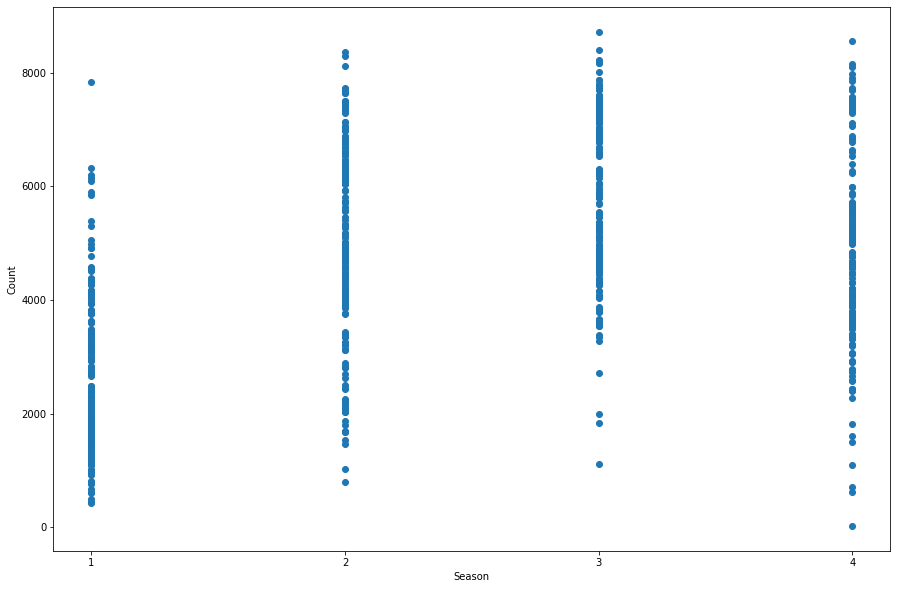

In [214]:
figure, axes = plt.subplots(figsize = (15, 10))

plt.scatter(data = df_day_data, x = 'season', y = 'count')
plt.xticks(ticks = [1, 2, 3, 4])
axes.set(title = '', xlabel = 'Season', ylabel = 'Count')

### Weather

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Weather'), Text(0, 0.5, 'Count')]

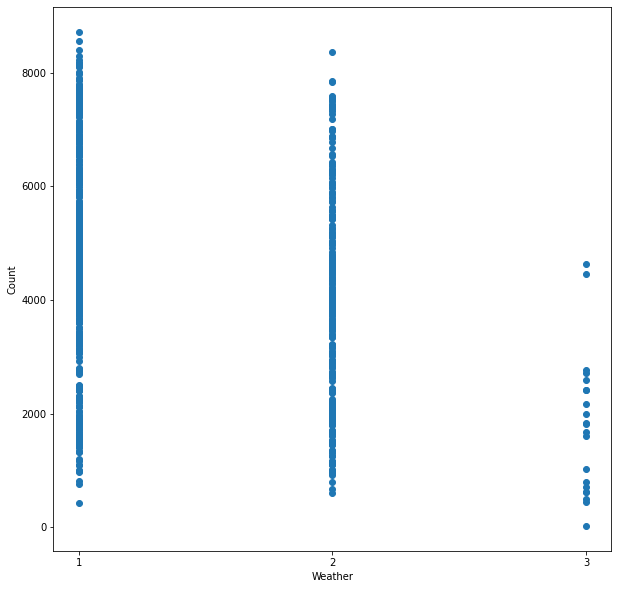

In [215]:
figure, axes = plt.subplots(figsize = (10, 10))

plt.scatter(data = df_day_data, x = 'weather', y = 'count')
plt.xticks(ticks = [1, 2, 3])
axes.set(title = '', xlabel = 'Weather', ylabel = 'Count')

### Temperature

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Temperature'), Text(0, 0.5, 'Count')]

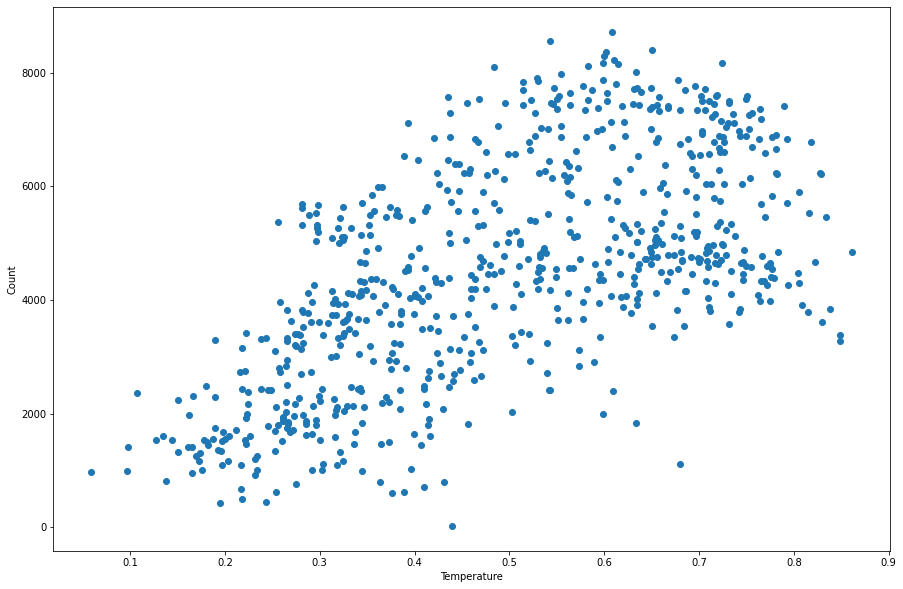

In [216]:
figure, axes = plt.subplots(figsize = (15, 10))

plt.scatter(data = df2, x = 'temperature', y = 'count')
# plt.xticks(ticks = [1, 2, 3])
axes.set(title = '', xlabel = 'Temperature', ylabel = 'Count')

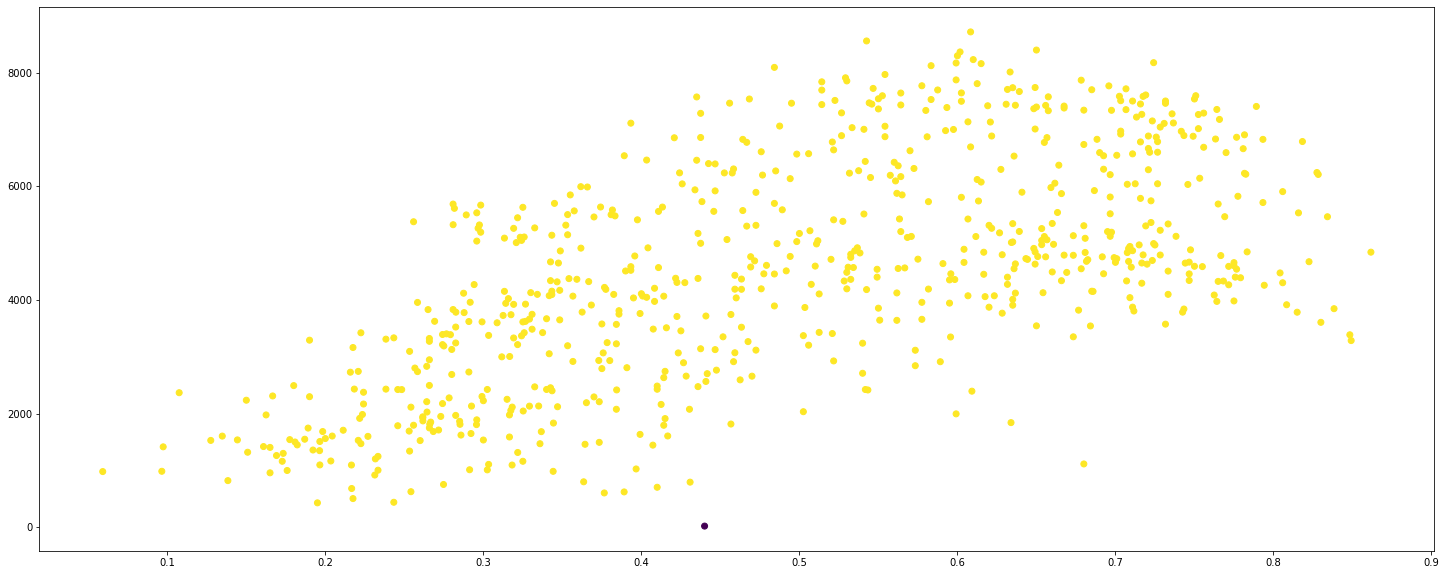

In [242]:
figure, axes = plt.subplots(figsize = (25, 10))

# figure.suptitle("Count of bikes with windspeed")

knn = 10
cont_fraction = 0.001

lof = LocalOutlierFactor(n_neighbors = knn, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(df_day_data)

# predict the anomalies
pred = lof.fit_predict(df_day_data)

df2['Anomaly'] = pd.Categorical(pred)

print(plt.scatter(data = df2, x = 'temperature', y = 'count', c = 'Anomaly', cmap = 'viridis'))

In [241]:
for i in range(len(df2.index)):
    if(df2['Anomaly'][i] != 1):
        print(df2.loc[[i]]) # this row 'i' is the anomaly
    

     season  year  month  weekday  weather  temperature  humidity  windspeed  \
623       3     1      9        6        1     0.608333  0.501667   0.247521   

     count   temp_cat    hum_cat   wind_cat Anomaly  
623   8714  0.6 - 0.7  0.5 - 0.6  0.2 - 0.3      -1  


### Humidity

### Windspeed

## 1.7 Check missing

In [219]:
pd.DataFrame(df_day_data.isnull().sum(), columns=["Count"])

,Count
season,0
year,0
month,0
weekday,0
weather,0
temperature,0
humidity,0
windspeed,0
count,0


## 1.8 Save the file

In [220]:
# # save cleaned test data to csv file for later use
# df_day = pd.read_csv("../dataset/day.csv")
# export_csv = df_cleaned.to_csv("../dataset/cleaned.csv", index = None, header=True)
# # df_cleaned

# Graph

In [221]:
df2.head()

,season,year,month,weekday,weather,temperature,humidity,windspeed,count,temp_cat,hum_cat,wind_cat,Anomaly
0,1,0,1,6,2,0.344167,0.805833,0.160446,985,0.3 - 0.4,0.8 - 0.9,0.1 - 0.2,1
1,1,0,1,0,2,0.363478,0.696087,0.248539,801,0.3 - 0.4,0.6 - 0.7,0.2 - 0.3,1
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349,0.1 - 0.2,0.4 - 0.5,0.2 - 0.3,1
3,1,0,1,2,1,0.200000,0.590435,0.160296,1562,0.2 - 0.3,0.5 - 0.6,0.1 - 0.2,1
4,1,0,1,3,1,0.226957,0.436957,0.186900,1600,0.2 - 0.3,0.4 - 0.5,0.1 - 0.2,1


## Weekday

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Month'), Text(0, 0.5, 'Count')]

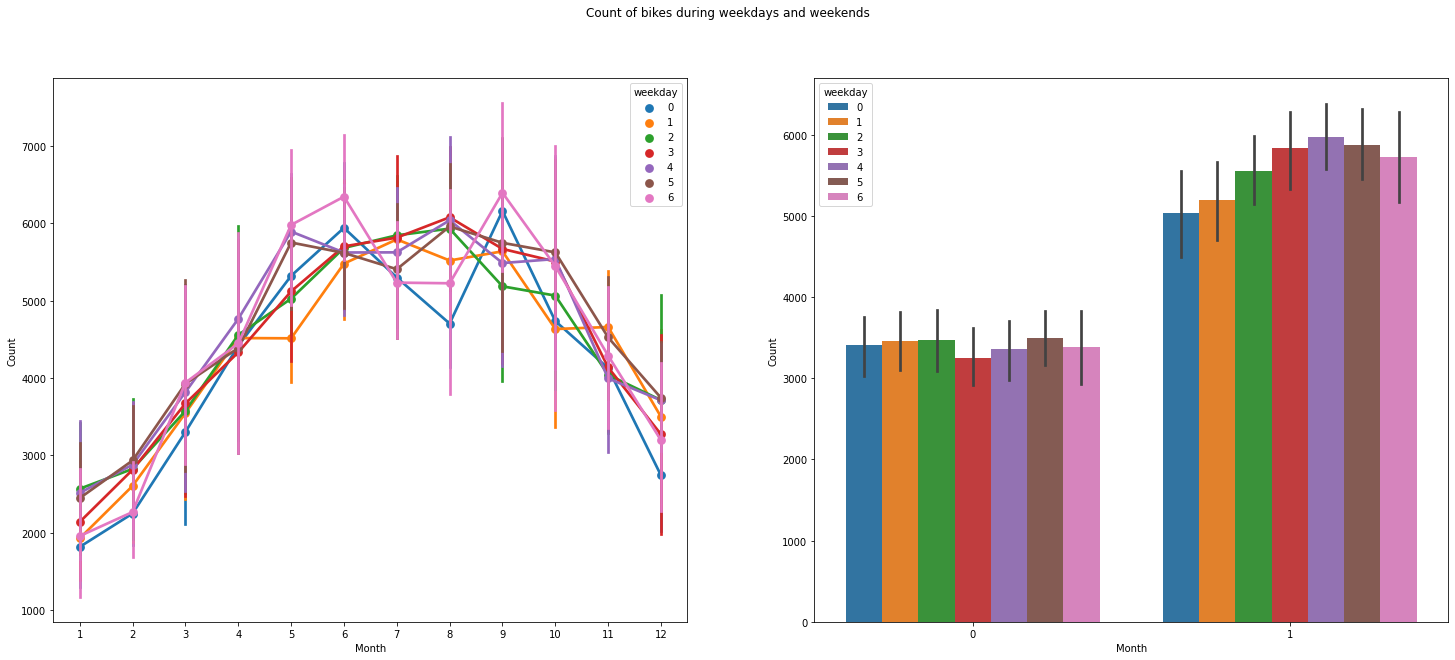

In [222]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes during weekdays and weekends")

sns.pointplot(data = df_day_data, x = 'month', y = 'count', hue = 'weekday', ax = axes[0])
axes[0].set(title = '', xlabel = 'Month', ylabel = 'Count')

sns.barplot(data = df_day_data, x = 'year', y = 'count', hue = 'weekday', ax = axes[1])
axes[1].set(title = '', xlabel = 'Month', ylabel = 'Count')


## Season

<AxesSubplot:xlabel='year', ylabel='count'>

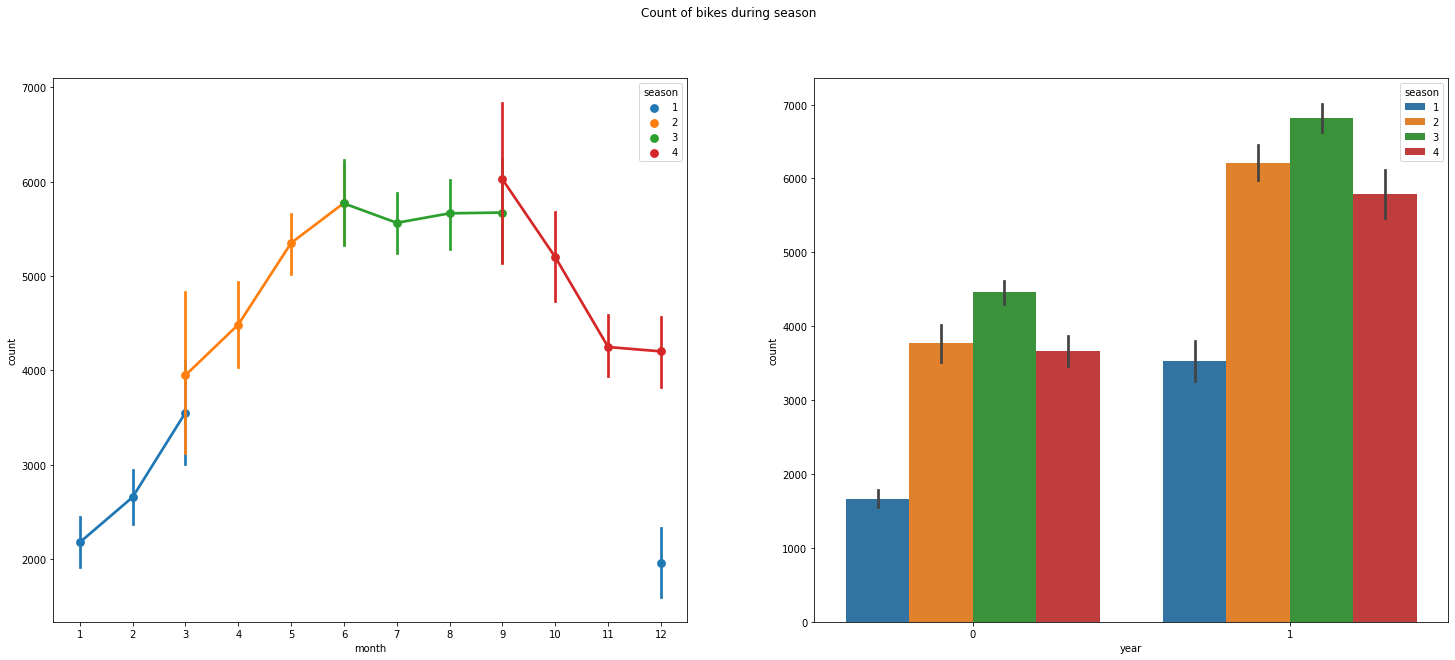

In [223]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes during season")

sns.pointplot(data = df_day_data, x = 'month', y = 'count', hue = 'season', ax = axes[0])

sns.barplot(data = df_day_data, x = 'year', y = 'count', hue = 'season', ax = axes[1])

## Weather

<AxesSubplot:xlabel='year', ylabel='count'>

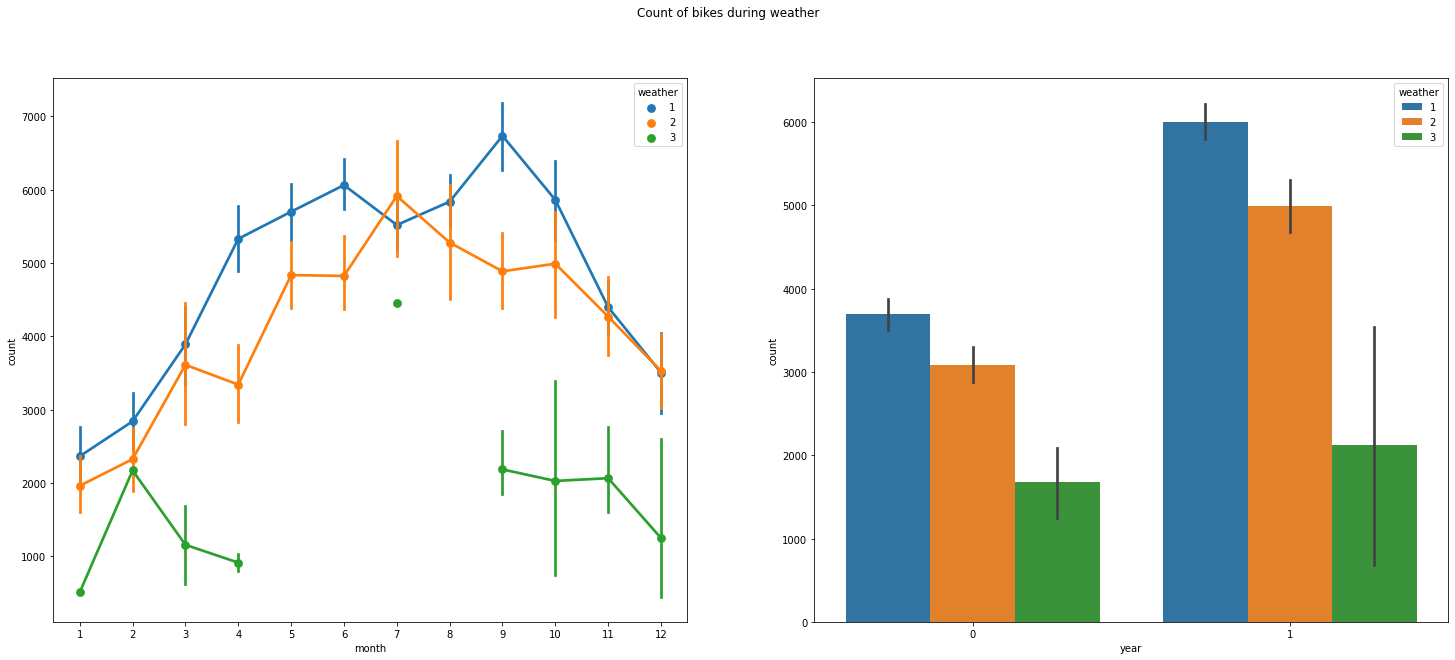

In [224]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes during weather")

sns.pointplot(data = df_day_data, x = 'month', y = 'count', hue = 'weather', ax = axes[0])

sns.barplot(data = df_day_data, x = 'year', y = 'count', hue = 'weather', ax = axes[1])

## Temperature

<AxesSubplot:xlabel='month', ylabel='count'>

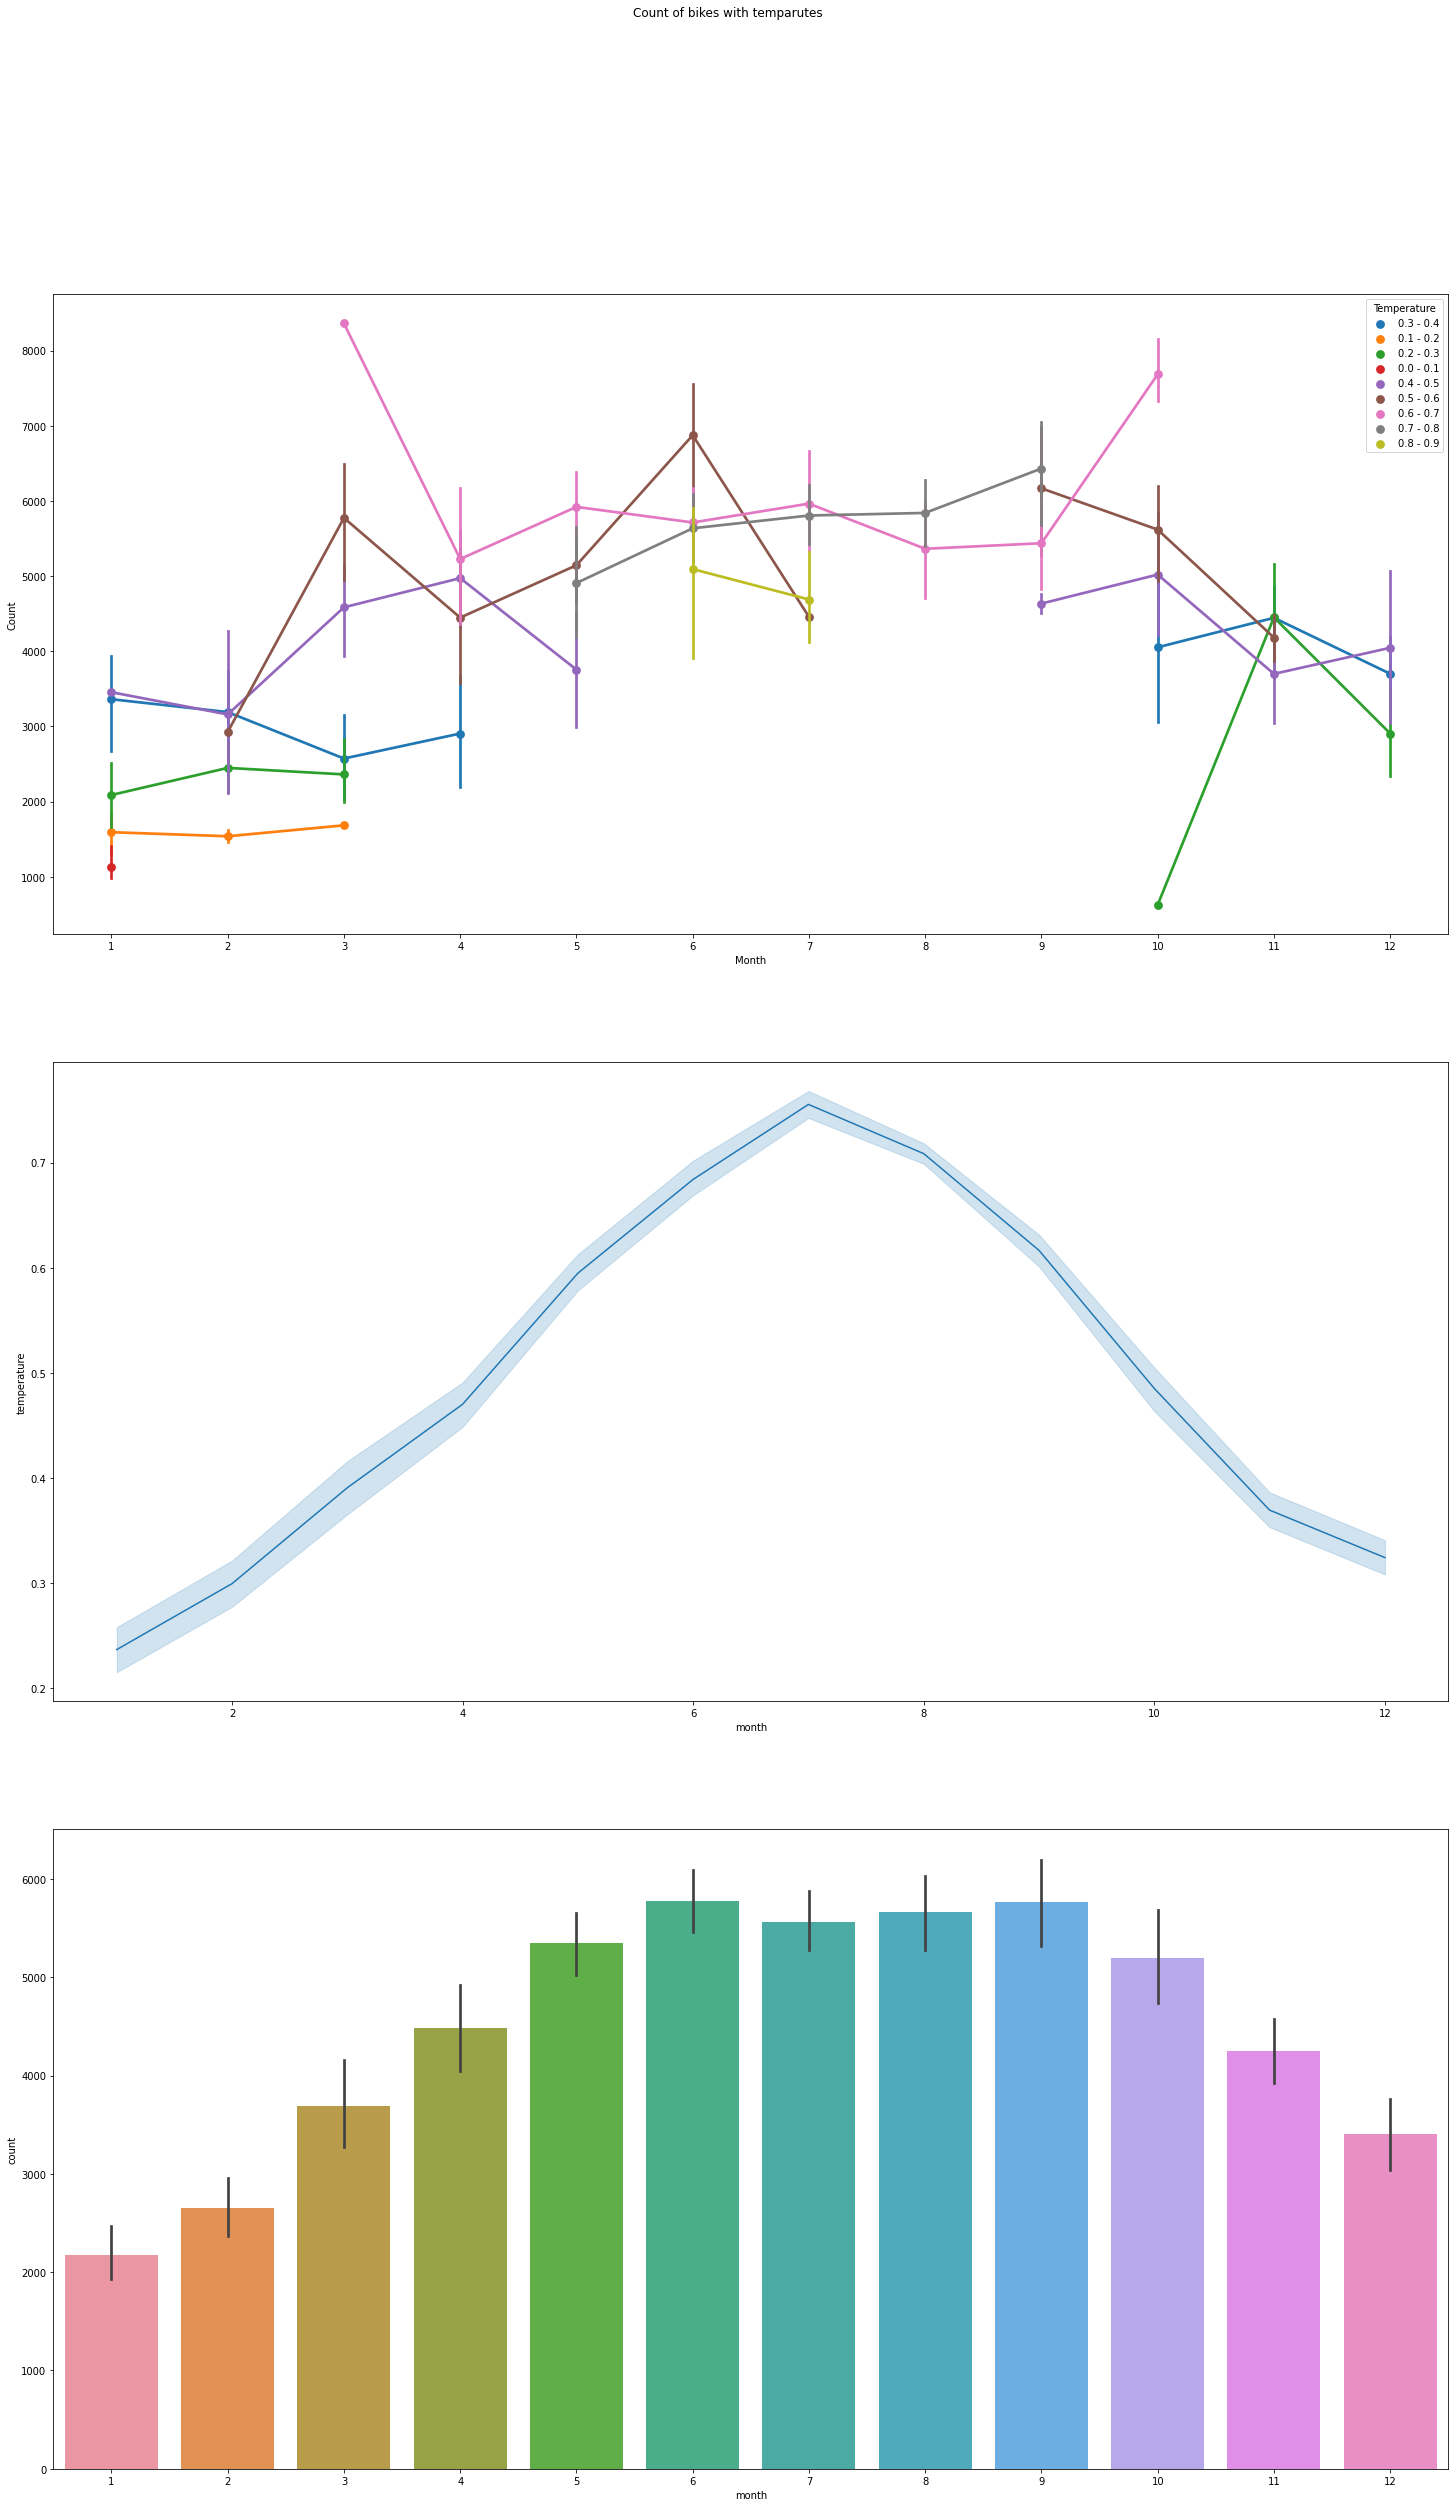

In [225]:
figure, axes = plt.subplots(3, 1, figsize = (25, 40))

figure.suptitle("Count of bikes with temparutes")

sns.pointplot(data = df2, x = 'month', y = 'count', hue = 'temp_cat', ax = axes[0])
axes[0].legend(title='Temperature')
axes[0].set(title = '', xlabel = 'Month', ylabel = 'Count')

# sns.barplot(data = df2, x = 'year', y = 'count', hue = 'temp_cat', ax = axes[1])
# axes[1].legend(title='Temperature')
# axes[1].set(title = '', xlabel = 'Year', ylabel = 'Count')

sns.lineplot(data = df2, x = 'month', y = 'temperature', ax = axes[1])
sns.barplot(data = df2, x = 'month', y = 'count', ax = axes[2])





## Humidity

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Year'), Text(0, 0.5, 'Count')]

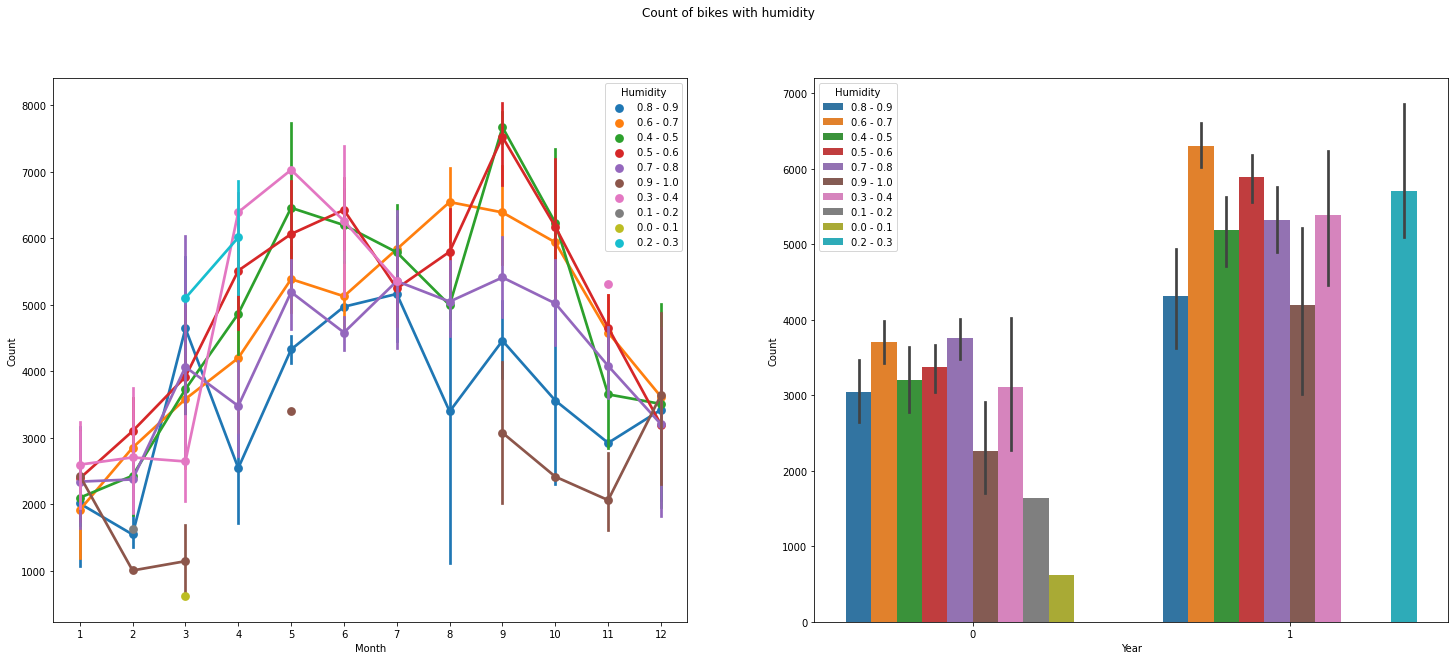

In [226]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes with humidity")

sns.pointplot(data = df2, x = 'month', y = 'count', hue = 'hum_cat', ax = axes[0])
axes[0].legend(title='Humidity')
axes[0].set(title = '', xlabel = 'Month', ylabel = 'Count')

sns.barplot(data = df2, x = 'year', y = 'count', hue = 'hum_cat', ax = axes[1])
axes[1].legend(title='Humidity')
axes[1].set(title = '', xlabel = 'Year', ylabel = 'Count')

## Windspeed

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Year'), Text(0, 0.5, 'Count')]

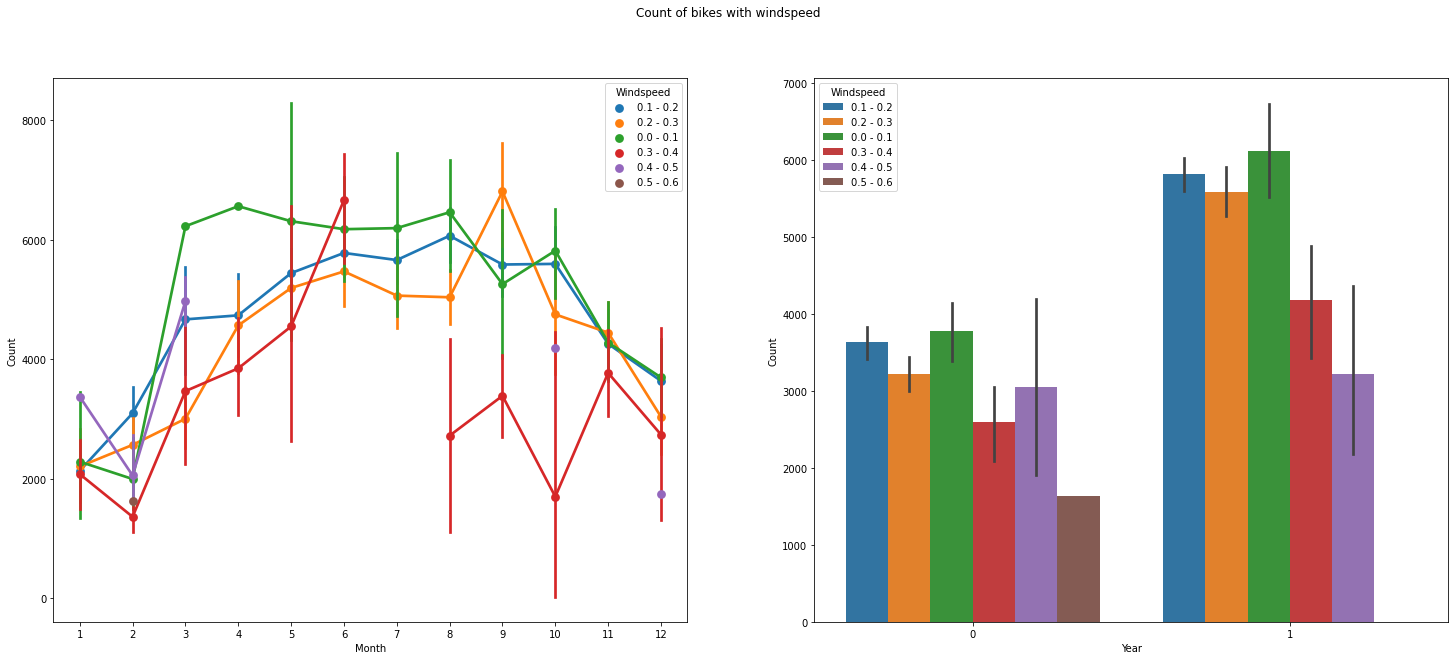

In [227]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes with windspeed")

sns.pointplot(data = df2, x = 'month', y = 'count', hue = 'wind_cat', ax = axes[0])
axes[0].legend(title='Windspeed')
axes[0].set(title = '', xlabel = 'Month', ylabel = 'Count')

sns.barplot(data = df2, x = 'year', y = 'count', hue = 'wind_cat', ax = axes[1])
axes[1].legend(title='Windspeed')
axes[1].set(title = '', xlabel = 'Year', ylabel = 'Count')

## Registered User

ValueError: Could not interpret input 'registereduser'

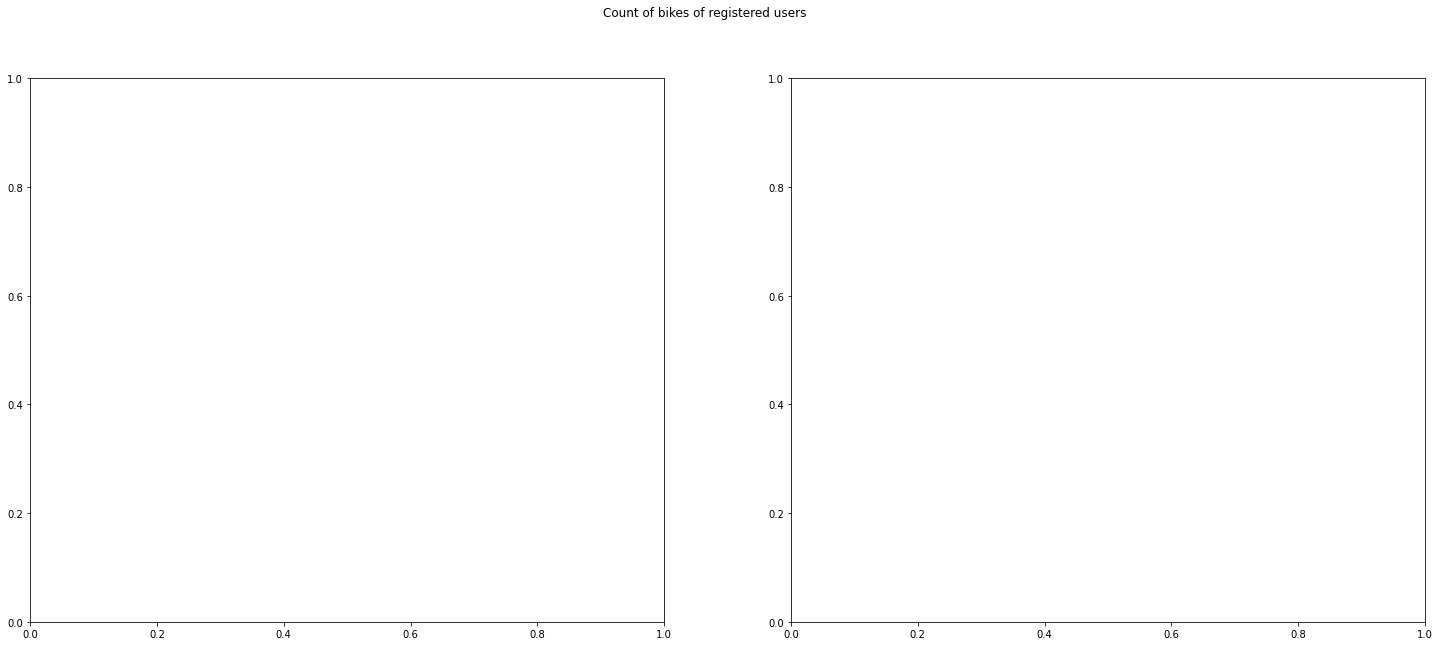

In [228]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes of registered users")

sns.pointplot(data = df_day_data, x = 'month', y = 'registereduser', ax = axes[0])
axes[0].set(xlabel = 'Month', ylabel = 'Registered User')

sns.barplot(data = df_day_data, x = 'year', y = 'registereduser', ax = axes[1])
axes[1].set(xlabel = 'Year', ylabel = 'Registered User')

## Unregisted User


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Unregistered User')]

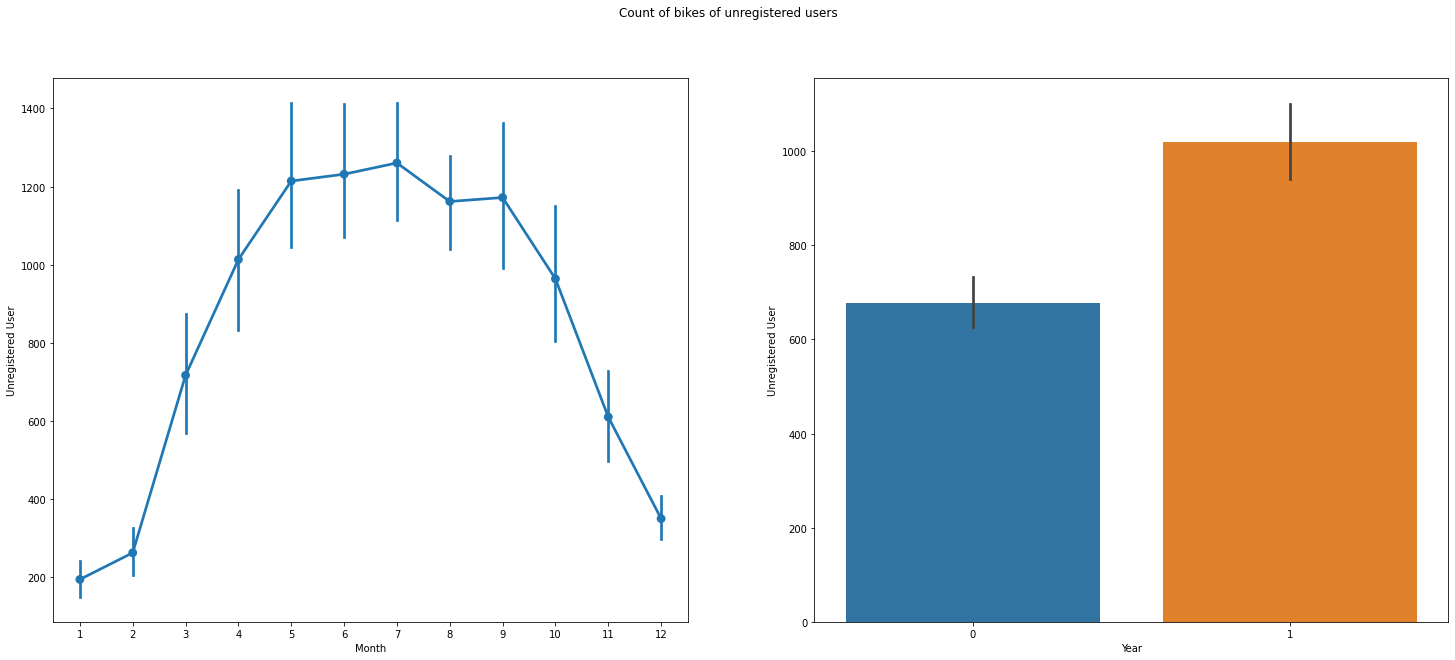

In [ ]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes of unregistered users")

sns.pointplot(data = df_day_data, x = 'month', y = 'casualuser', ax = axes[0])
axes[0].set(xlabel = 'Month', ylabel = 'Unregistered User')

sns.barplot(data = df_day_data, x = 'year', y = 'casualuser', ax = axes[1])
axes[1].set(xlabel = 'Year', ylabel = 'Unregistered User')

## Separate Data

In [ ]:
X_bike = df_day_data.drop(columns=['count','casualuser','registereduser'],axis=1)
y_bike = df_day_data['count']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bike, y_bike, test_size = 0.2, random_state = 0)
X_train.head()

,season,year,month,holiday,weekday,weather,temperature,temperaturefelt,humidity,windspeed
97,2,0,4,0,5,2,0.335833,0.324479,0.836250,0.226992
503,2,1,5,0,5,1,0.564167,0.551121,0.523333,0.136817
642,4,1,10,0,4,2,0.657500,0.607975,0.722917,0.117546
498,2,1,5,0,0,1,0.612500,0.585238,0.576250,0.225117
303,4,0,10,0,1,1,0.340000,0.356063,0.703333,0.106350


In [ ]:
y_train.head()

97     1471
503    7639
642    7328
498    6118
303    3669
Name: count, dtype: int64